## import package

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Membaca Dataset dan Data Cleaned

In [2]:
df = pd.read_csv('android_traffic.csv', sep=';')

df_copy = df.copy()

## Menghapus kolom bernilai NaN
df_cleaned = df_copy.drop(columns=['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate'], axis = 1)


## X adalah Independent dan Y adalah Dependent, dan Labeling pada x dan y

In [3]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, 13]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

encode = OneHotEncoder(handle_unknown='ignore')
X_encoded = encode.fit_transform(X)

## Training set dan Testing set

In [4]:
feature_names_out = encode.get_feature_names_out(input_features=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

## Features Selection

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  7845 non-null   object
 1   tcp_packets           7845 non-null   int64 
 2   dist_port_tcp         7845 non-null   int64 
 3   external_ips          7845 non-null   int64 
 4   vulume_bytes          7845 non-null   int64 
 5   udp_packets           7845 non-null   int64 
 6   tcp_urg_packet        7845 non-null   int64 
 7   source_app_packets    7845 non-null   int64 
 8   remote_app_packets    7845 non-null   int64 
 9   source_app_bytes      7845 non-null   int64 
 10  remote_app_bytes      7845 non-null   int64 
 11  source_app_packets.1  7845 non-null   int64 
 12  dns_query_times       7845 non-null   int64 
 13  type                  7845 non-null   object
dtypes: int64(12), object(2)
memory usage: 858.2+ KB


## Feature Selection dengan Information Gain Ratio

In [6]:
info_gain_ratio = mutual_info_classif(X_train, y_train)

feature_info_gain = pd.DataFrame({'Feature': feature_names_out, 'Information Gain Ratio': info_gain_ratio})

feature_info_gain = feature_info_gain.sort_values(by='Information Gain Ratio', ascending=False)

print(feature_info_gain)


                     Feature  Information Gain Ratio
114            tcp_packets_0            7.629834e-02
72             name_Plankton            5.851905e-02
1043          external_ips_0            5.796722e-02
1074          vulume_bytes_0            5.796722e-02
75              name_Reading            5.415130e-02
...                      ...                     ...
4818      vulume_bytes_25651            6.661338e-16
13824  remote_app_bytes_4766            6.661338e-16
4812      vulume_bytes_25494            6.661338e-16
13828  remote_app_bytes_4774            6.661338e-16
8942   source_app_bytes_5413            6.661338e-16

[17884 rows x 2 columns]


## Menghitung n_neighbors

In [7]:
len(y_test)

1569

In [8]:
import math
math.sqrt(len(y_test))

39.61060464067672

## Classifier KNeighbors

In [9]:
classifier = KNeighborsClassifier(n_neighbors = 39, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=39)

In [11]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Confusion Matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
print(cm)

[[845  78]
 [ 71 575]]


In [14]:
report = classification_report(y_test, y_pred)

In [15]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       923
           1       0.88      0.89      0.89       646

    accuracy                           0.91      1569
   macro avg       0.90      0.90      0.90      1569
weighted avg       0.91      0.91      0.91      1569



## Accuracy

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9050350541746335


## visualisasi

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

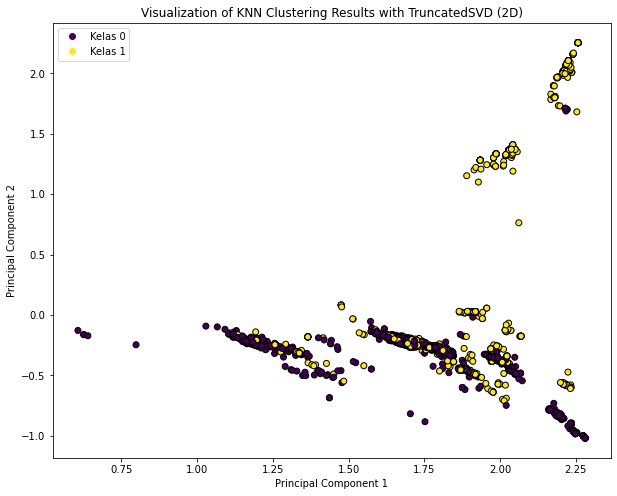

In [20]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components = 2)
X_svd = svd.fit_transform(X_train)

knn_model = KNeighborsClassifier(n_neighbors = 39)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

X_svd_test = svd.transform(X_test)

X_svd_with_pred = np.column_stack((X_svd_test, y_pred))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svd_with_pred[:, 0], X_svd_with_pred[:, 1], c=X_svd_with_pred[:, 2], cmap='viridis', 
                      edgecolors='k', label='Kelas')

legend_labels = ['Kelas 0', 'Kelas 1']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.title('Visualization of KNN Clustering Results with TruncatedSVD (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Visualisasi Confusion Matrix

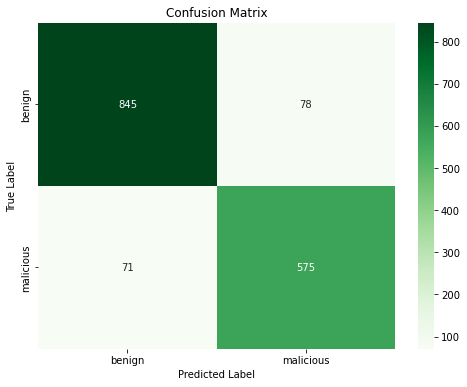

In [24]:
def plot_confusion_matrix(conf_matrix, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt=".2f" if normalize else "d", cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
plot_confusion_matrix(cm, target_names=['benign', 'malicious'], title='Confusion Matrix', cmap='Greens', normalize=False)